Add comments, titles, spaces, rearrange codes

In [226]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
import matplotlib
import seaborn as sns
os.chdir(r'D:\sg project\outputs')

### Average Farmer Suicide Rate Map (Work on viz)

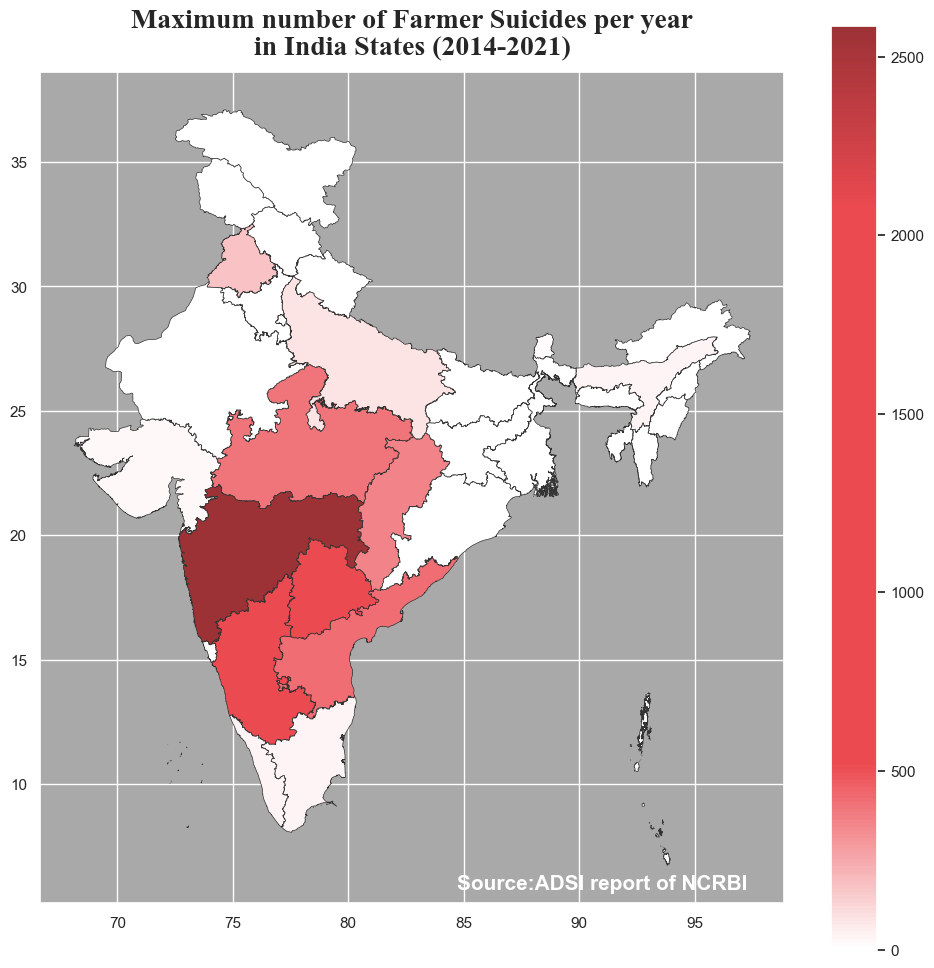

In [304]:
#Read India state map
shppath=r'D:\sg project\India_State_Shapefile\India_State_Boundary.shp'
shpfile = gpd.read_file(shppath)

#Read Suicide Data
tabpath=r'D:\sg project\ADSI xl data\ADSI compiled.xlsx'
tabfile= pd.read_excel(tabpath)

#Join both based on States
merged = shpfile.set_index('Name').join(tabfile.set_index('States/Uts'))

#Visualization
sns.set(rc={'axes.facecolor':'darkgray', 'figure.facecolor':'white'})
fig, ax = plt.subplots(1, figsize=(12, 12))
cmap=matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ffffff","#ec4a51","#ec4a51","#ec4a51","#ec4a51","#9c3236"])
#ax.set_title('Average number of Farmers Suicide in india (2014-2021)',y=1.01,
             #fontdict={'fontsize': '15', 'fontweight' : '10'})
ax.set_title("Maximum number of Farmer Suicides per year\nin India States (2014-2021)",y=1.01,fontname="Times New Roman", size=20,fontweight="bold")
fig = merged.plot(column='Average', cmap=cmap, linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
fig.text(91,6,'Source:ADSI report of NCRBI', ha='center', va='center',size=15,fontweight='bold',color='#FFFFFF')
plt.savefig('map.jpeg',bbox_inches='tight')

### Suicide Rate of each state as list

In [24]:
#getting file
path=r'D:\sg project\ADSI xl data\ADSI compiled.xlsx'
file=pd.read_excel(path)

#state name and year
state=['Karnataka','Maharashtra','Madhya Pradesh','Telengana']
year=[str(x) for x in range(2014,2022)]

#convert file header into string
file.columns=[str(x) for x in file.columns]

sui_rate=[]

#iterate state of interest and get sui rate list
for i in state:
    
    #create new dataframe for only that state
    st=file[file["States/Uts"]==i]
    st_rate=[] 
    
    #iterate year of interest
    for j in year:
        sh=st[j]  #get value of that specific year
        row_list=sh.values #gets only the value
        st_rate.append(row_list[0]) 
    sui_rate.append(st_rate)
    
kar_sr,mah_sr,mp_sr,tel_sr = sui_rate

### Rainfall data as list

In [25]:
pathlist=glob.glob(r'D:\sg project\Weather\rf\*.xlsx')
state_rf=[]
for file in pathlist:
    tab=pd.read_excel(file)
    hotspot=tab['HOTSPOT'].tolist()
    rf_trend=[]
    for j in range (2014,2022):
        yr='Y'+str(j)
        rf=tab[yr].tolist()
        sum=0
        count=0
        for i in range (len(rf)):
            if hotspot[i]=='Y':
                if rf[i]=='-':
                    continue
                sum=sum+rf[i]
                count=count+1
                avg=sum/count
        rf_trend.append(round(avg,2))
    state_rf.append(rf_trend)
kar_rf,mah_rf,mp_rf,tel_rf=state_rf

### Fertiliser data as list

### Function for getting list from different excel files

In [227]:
# Several type Datssets from different sources and with different formats have been used in this study
# this function helps in accessing them with minimal work

def get_value(path,head_pos,sheetname,year_for,state_head,year_from,year_to,state_list):
    #get file
    file=pd.read_excel(path,header=head_pos,sheet_name=sheetname)
    #states list
    state=state_list
    #year list
    if(year_for=='yyyy'):
        year=[str(x) for x in range(year_from,year_to+1)]
    elif (year_for=='yyyy-yyyy'):
        year=[(str(x)+'-'+str(x+1)) for x in range (year_from,year_to)]
    elif(year_for=='yyyy-yy'):
        year=[str(x)+'-'+(str(x+1))[2:4] for x in range(year_from,year_to)] 
    elif(year_for=='yy-yy'):
        year=[str(x)[2:4]+'-'+(str(x+1))[2:4] for x in range(year_from,year_to)] 
    #convert header to string
    file.columns=[str(x) for x in file.columns]
    
    final_list=[]
    
    for i in state:
        #create new dataframe for only that state
        st=file[file[str(state_head)]==i]
        state_list=[]
        #iterate year of interest
        for j in year:
            sh=st[j]  #get value of that specific year
            row_list=sh.values #gets only the value
            if row_list[0]=='-':
                state_list.append(None)
            else:
                state_list.append(row_list[0]) 
        final_list.append(state_list)
    return final_list

### Getting values using function

In [228]:
#Fertiliser
state=['Karnataka','Maharashtra','Madhya Pradesh','Telangana']
kar_fer,mah_fer,mp_fer,tel_fer = get_value(r'D:\sg project\cost of production\uncorrupted files\fertiliser.xlsx',
                                           3,'Sheet1','yyyy-yyyy',"States/UTs",2013,2021,state)

#Pesticide
state=['Karnataka','Maharashtra','Madhya Pradesh','Telangana']
kar_pes,mah_pes,mp_pes,tel_pes = get_value(r'D:\sg project\cost of production\uncorrupted files\pesticide.xlsx',
                                           3,'Sheet1','yyyy-yyyy',"States/Uts",2013,2021,state)

#wages
state=['Karnataka','Maharashtra','Madhya Pradesh','Andhra Pradesh']
kar_wage,mah_wage,mp_wage,tel_wage=get_value(r'D:\sg project\cost of production\uncorrupted files\wages.xlsx',3,'Sheet1','yyyy-yyyy',"State/Union Territory",2014,2021,state)

#India's Crop production
country=['India']
crop_pro=get_value(r'D:\sg project\crop production\API_AG.PRD.CROP.XD_DS2_en_excel_v2_4775177.xls',3,'Data','yyyy',"Country Name",2014,2020,country)

#Gross Economic value
state=['Karnataka','Maharashtra','Madhya Pradesh','Telangana']
kar_gv,mah_gv,mp_gv,tel_gv=get_value(r'D:\sg project\crop production\gross21.xlsx',5,'T_23(iii)','yyyy-yy',"State/Union Territory",2013,2020,state)

#Credit
state=['Karnataka','Maharashtra','Madhya Pradesh','Telangana']
kar_cre,mah_cre,mp_cre,tel_cre=get_value(r'D:\sg project\Economical support\credit21.xlsx',4,'T_140(Concld.)','yyyy',"Region/State/Union Territory",2014,2021,state)


## Code for handling year-wise multiple files of same format

### Insurance

In [ ]:
#files from folder location
pathlist=glob.glob(r'D:\sg project\Economical support\Insurance\*.xls')

state=['Karnataka','Maharashtra','Madhya Pradesh','Telangana']
kar_ins,mah_ins,mp_ins,tel_ins=[[],[],[],[]]
#files in a loop
for file in pathlist:

    #read file
    dfs=pd.read_html(file)

    #html reads as list so select dataframe from the first element
    df=dfs[0]

    #run dataframe values in a loop
    for i in range(0,len(df)):
        if(((df.iloc[i].values)[0])=='Karnataka'):
            ls=float(((df.iloc[i].values)[1]))-float(((df.iloc[i].values)[-1]))
            kar_ins.append(ls)
        if(((df.iloc[i].values)[0])=='Maharashtra'):
            ls=float(((df.iloc[i].values)[1]))-float(((df.iloc[i].values)[-1]))
            mah_ins.append(ls)
        if(((df.iloc[i].values)[0])=='Madhya Pradesh'):
            ls=float(((df.iloc[i].values)[1]))-float(((df.iloc[i].values)[-1]))
            mp_ins.append(ls)
        if(((df.iloc[i].values)[0])=='Telangana'):
            ls=float(((df.iloc[i].values)[1]))-float(((df.iloc[i].values)[-1]))
            tel_ins.append(ls)

## Visualizing

<Figure size 640x480 with 0 Axes>

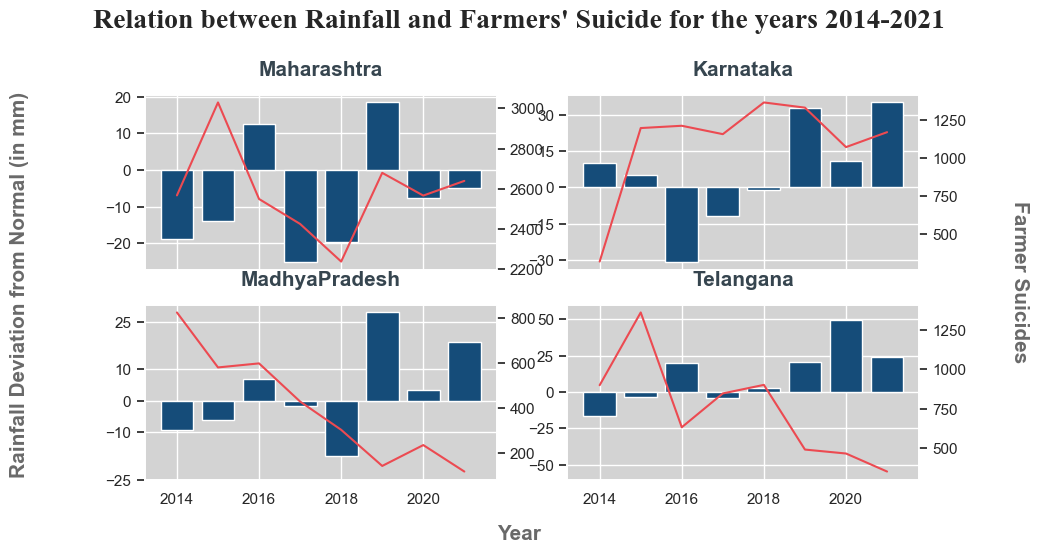

In [310]:
#set background spacing
sns.set(rc={'axes.facecolor':'lightgray', 'figure.facecolor':'white'})

plt.subplots_adjust(left=0.5,
                    bottom=0.5,
                    right=0.6,
                    top=0.6,
                    wspace=0.4,
                    hspace=0.4)

year=[2014,2015,2016,2017,2018,2019,2020,2021]

fig,ax=plt.subplots(2,2,sharex=True,figsize=(10,5))
fig.suptitle("Relation between Rainfall and Farmers' Suicide for the years 2014-2021",y=1.05,fontname="Times New Roman", size=20,fontweight="bold")
plt.ylim((-60,60))
ax[0,0].bar(year,mah_rf,color='#154c79')
ax[0,1].bar(year,kar_rf,color='#154c79')
ax[1,0].bar(year,mp_rf,color='#154c79')
ax[1,1].bar(year,tel_rf,color='#154c79')
ax[0,0].set_title('Maharashtra',size=15,fontweight="bold",pad=14,color='#36454F')
ax[0,1].set_title('Karnataka',size=15,fontweight="bold",pad=14,color='#36454F')
ax[1,0].set_title('MadhyaPradesh',size=15,fontweight="bold",pad=14,color='#36454F')
ax[1,1].set_title('Telangana',size=15,fontweight="bold",pad=14,color='#36454F')
ax[0,1].set_yticks([-30,-15,0,15,30])
ax[1,0].set_yticks([-25,-10,0,10,25])
ax1,ax2,ax3,ax4=ax[0,0].twinx(),ax[0,1].twinx(),ax[1,0].twinx(),ax[1,1].twinx()
ax1.plot(year,mah_sr,color='#ec4a51')
ax2.plot(year,kar_sr,color='#ec4a51')
ax3.plot(year,mp_sr,color='#ec4a51')
ax4.plot(year,tel_sr,color='#ec4a51')
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
ax4.grid(False)
fig.text(0.5, 0.0, 'Year', ha='center', va='center',size=15,fontweight="bold",color='#696969')
fig.text(0, 0.5, 'Rainfall Deviation from Normal (in mm)', ha='center', va='center', rotation=90,size=15,fontweight="bold",color='#696969')
fig.text(1, 0.5, "Farmer Suicides " , ha='center', va='center', rotation=270,size=15,fontweight="bold",color='#696969')
plt.savefig('Rainfall.png',bbox_inches='tight')

In [122]:
#creating dict

mah=dict({'Year':year,'Fertiliser Consumption in Kg per hectare': mah_fer,'Pesticide_consumption in 10 Tonnes':mah_pes,'Agricultural Labour Wage in Rs':mah_wage})
kar=dict({'Year':year,'Fertiliser Consumption in Kg per hectare': kar_fer,'Pesticide_consumption in 10 Tonnes':kar_pes,'Agricultural Labour Wage in Rs':kar_wage})
mp=dict({'Year':year,'Fertiliser Consumption in Kg per hectare': mp_fer,'Pesticide_consumption in 10 Tonnes':mp_pes,'Agricultural Labour Wage in Rs':mp_wage})
tel=dict({'Year':year,'Fertiliser Consumption in Kg per hectare': tel_fer,'Pesticide_consumption in 10 Tonnes':tel_pes,'Agricultural Labour Wage in Rs':tel_wage})

#creating dataframe
mah_df=pd.DataFrame(mah)
kar_df=pd.DataFrame(kar)
mp_df=pd.DataFrame(mp)
tel_df=pd.DataFrame(tel)

#setting index & manipulating data
dfs=[mah_df,kar_df,mp_df,tel_df]
for df in dfs:
    df.set_index('Year',inplace=True)
    df['Pesticide_consumption in 10 Tonnes']=df['Pesticide_consumption in 10 Tonnes']/10
    #df['Farmer Suicides']=df['Farmer Suicides']/10


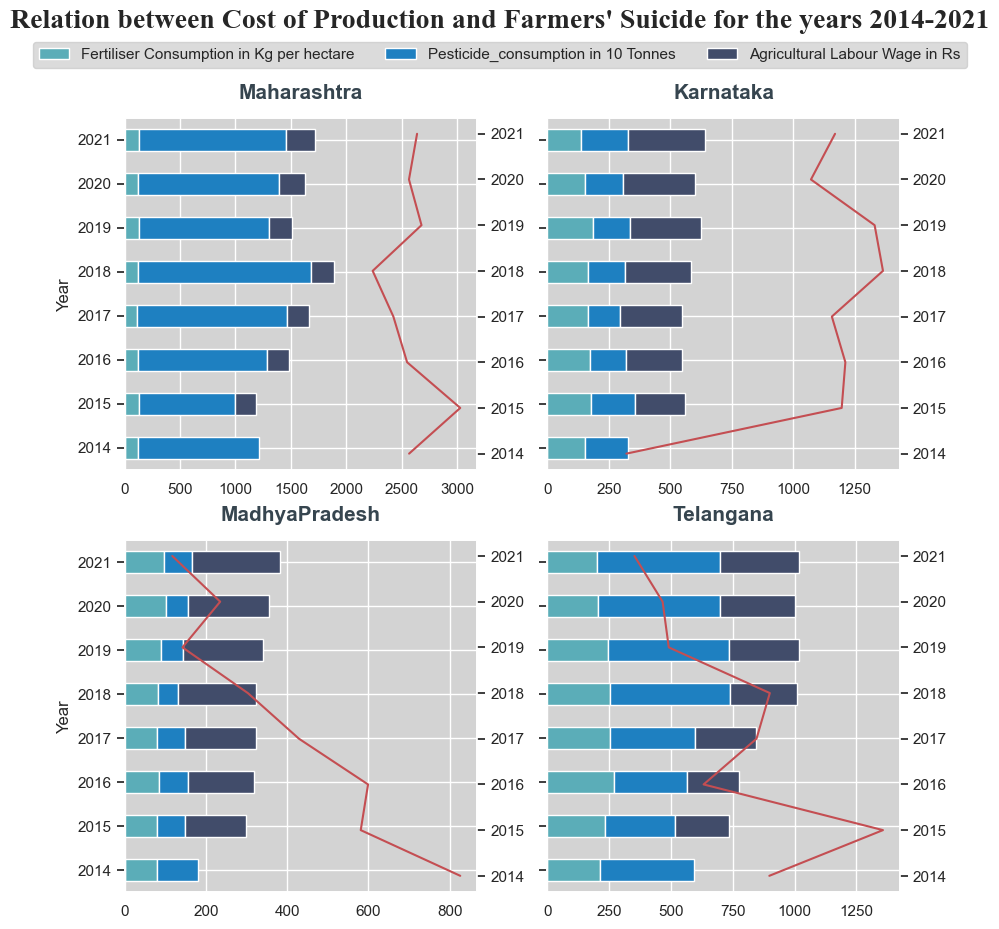

In [127]:
font_color = '#525252'
colors = [ '#5badb8', '#1e80c1', '#414c6a']
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharey=True,figsize=(5,10))
axes=[ax1,ax2,ax3,ax4]
count=0
for df in dfs:
    df.plot.barh(ax=axes[count],stacked=True,color=colors,figsize=(10,6),legend=False)
    count=count+1
ax1.set_title('Maharashtra',size=15,fontweight="bold",pad=14,color='#36454F')
ax2.set_title('Karnataka',size=15,fontweight="bold",pad=14,color='#36454F')
ax3.set_title('MadhyaPradesh',size=15,fontweight="bold",pad=14,color='#36454F')
ax4.set_title('Telangana',size=15,fontweight="bold",pad=14,color='#36454F')
handles, labels = ax1.get_legend_handles_labels()
t1=ax1.twinx()
t1.plot(mah_sr,year,'r')
t1.grid(False)
t2=ax2.twinx()
t2.plot(kar_sr,year,'r')
t2.grid(False)
t3=ax3.twinx()
t3.plot(mp_sr,year,'r')
t3.grid(False)
t4=ax4.twinx()
t4.plot(tel_sr,year,'r')
t4.grid(False)
fig.legend(handles, labels, loc='lower center',ncol=3,bbox_to_anchor=(0.5,2.06))
plt.subplots_adjust(top=1.99,bottom=0.7)
fig.suptitle("Relation between Cost of Production and Farmers' Suicide for the years 2014-2021",y=2.17,fontname="Times New Roman", size=20,fontweight="bold")
plt.savefig(r'Cost.png',bbox_inches='tight')

In [128]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

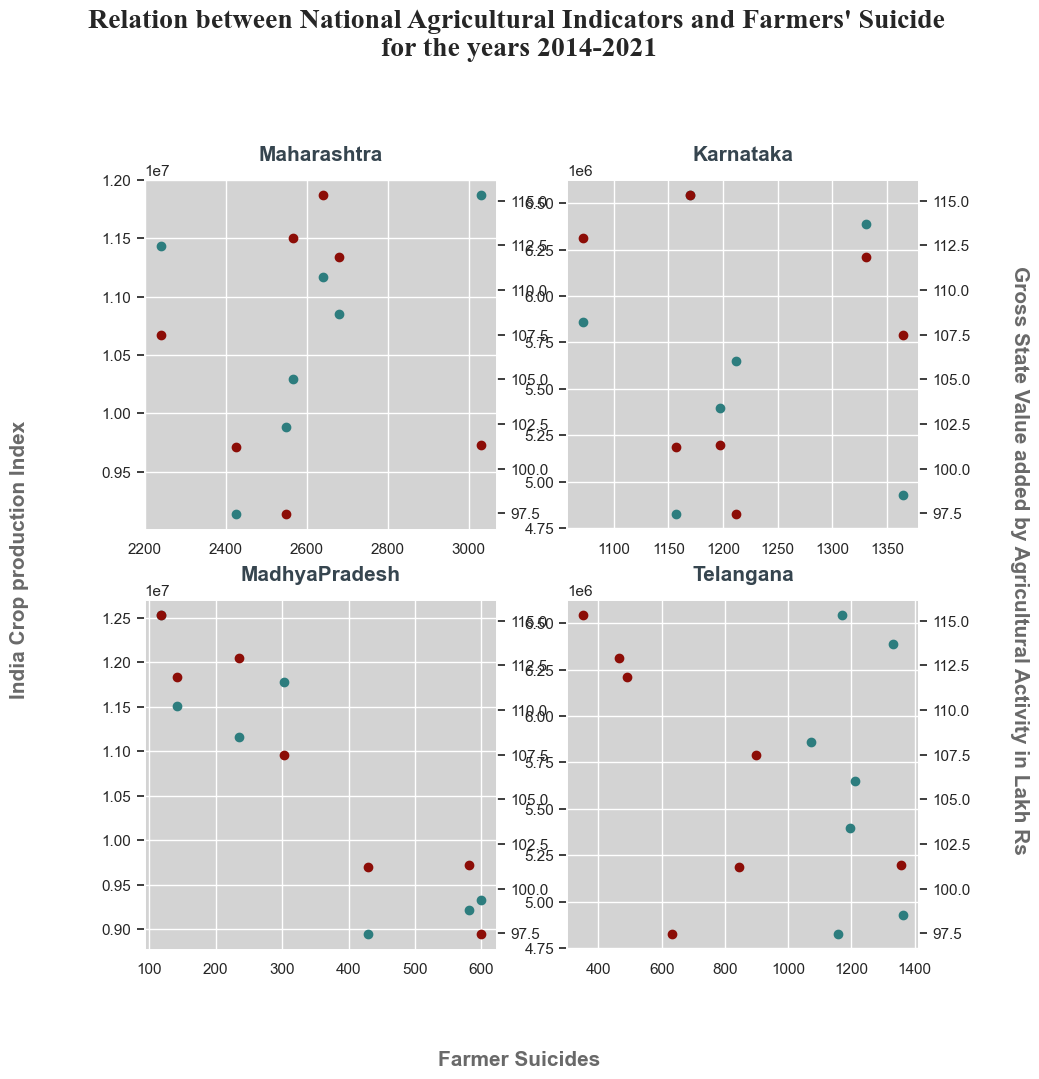

In [290]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,10))
fig.suptitle("Relation between National Agricultural Indicators and Farmers' Suicide \nfor the years 2014-2021",y=1.05,fontname="Times New Roman", size=20,fontweight="bold")
a=ax1.scatter(mah_sr[1:],mah_gv,color='#2d7d7e')
ax2.scatter(kar_sr[1:],kar_gv,color='#2d7d7e')
ax3.scatter(mp_sr[1:],mp_gv,color='#2d7d7e')
ax4.scatter(kar_sr[1:],kar_gv,color='#2d7d7e')
t1=ax1.twinx()
t1.grid(False)
t1.scatter(mah_sr[1:],crop_pro,color='#8c0d07')
t2=ax2.twinx()
t2.grid(False)
t2.scatter(kar_sr[1:],crop_pro,color='#8c0d07')
t3=ax3.twinx()
t3.grid(False)
t3.scatter(mp_sr[1:],crop_pro,color='#8c0d07')
t4=ax4.twinx()
t4.grid(False)
t4.scatter(tel_sr[1:],crop_pro,color='#8c0d07')
ax1.set_title('Maharashtra',size=15,fontweight="bold",pad=14,color='#36454F')
ax2.set_title('Karnataka',size=15,fontweight="bold",pad=14,color='#36454F')
ax3.set_title('MadhyaPradesh',size=15,fontweight="bold",pad=14,color='#36454F')
ax4.set_title('Telangana',size=15,fontweight="bold",pad=14,color='#36454F')
fig.text(0.5, 0.0, 'Farmer Suicides', ha='center', va='center',size=15,fontweight="bold",color='#696969')
fig.text(0, 0.5, 'India Crop production Index', ha='center', va='center', rotation=90,size=15,fontweight="bold",color='#696969')

fig.text(1, 0.5, "Gross State Value added by Agricultural Activity in Lakh Rs" , ha='center', va='center', rotation=270,size=15,fontweight="bold",color='#696969')
plt.savefig('Indicator.png',bbox_inches='tight')

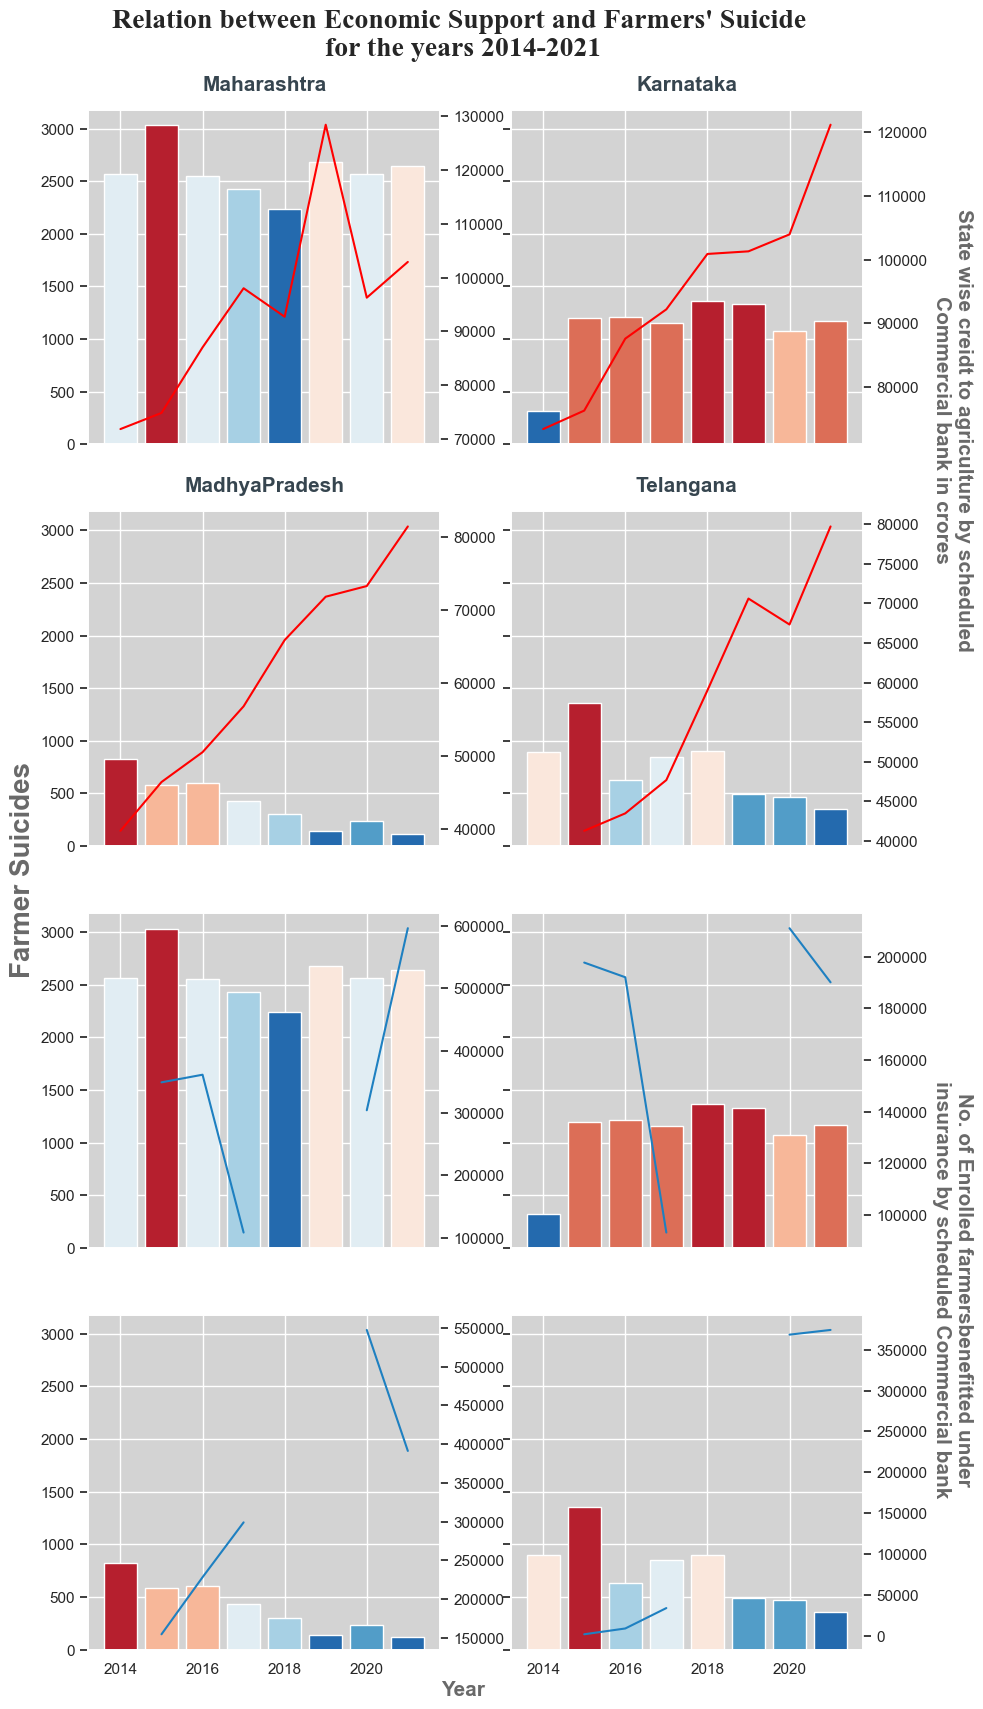

In [303]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize=(10,20),sharex=True,sharey=True)
t1=ax1.twinx()
t1.grid(False)
t2=ax2.twinx()
t2.grid(False)
t4=ax4.twinx()
t4.grid(False)
t3=ax3.twinx()
t3.grid(False)
t5=ax5.twinx()
t5.grid(False)
t6=ax6.twinx()
t6.grid(False)
t7=ax7.twinx()
t7.grid(False)
t8=ax8.twinx()
t8.grid(False)

fig.suptitle("Relation between Economic Support and Farmers' Suicide \nfor the years 2014-2021",y=0.93,fontname="Times New Roman", size=20,fontweight="bold")

ax1.bar(year,mah_sr,color=colors_from_values(mah_sr,'RdBu_r'))
ax2.bar(year,kar_sr,color=colors_from_values(kar_sr,'RdBu_r'))
ax3.bar(year,mp_sr,color=colors_from_values(mp_sr,'RdBu_r'))
ax4.bar(year,tel_sr,color=colors_from_values(tel_sr,'RdBu_r'))

ax5.bar(year,mah_sr,color=colors_from_values(mah_sr,'RdBu_r'))
ax6.bar(year,kar_sr,color=colors_from_values(kar_sr,'RdBu_r'))
ax7.bar(year,mp_sr,color=colors_from_values(mp_sr,'RdBu_r'))
ax8.bar(year,tel_sr,color=colors_from_values(tel_sr,'RdBu_r'))

t1.plot(year, mah_cre, color='red')
t2.plot(year, kar_cre, color='red' )
t3.plot(year, mp_cre, color='red')
t4.plot(year, tel_cre, color='red')
t5.plot(year[1:], mah_ins, color='#1e80c1' )
t6.plot(year[1:], kar_ins, color='#1e80c1' )
t7.plot(year[1:], mp_ins, color='#1e80c1')
t8.plot(year[1:], tel_ins, color='#1e80c1')

ax1.set_title('Maharashtra',size=15,fontweight="bold",pad=14,color='#36454F')
ax2.set_title('Karnataka',size=15,fontweight="bold",pad=14,color='#36454F')
ax3.set_title('MadhyaPradesh',size=15,fontweight="bold",pad=14,color='#36454F')
ax4.set_title('Telangana',size=15,fontweight="bold",pad=14,color='#36454F')
fig.text(0.5, 0.09, 'Year', ha='center', va='center',size=15,fontweight="bold",color='#696969')
fig.text(0.06, 0.5, 'Farmer Suicides', ha='center', va='center', rotation=90,size=20,fontweight="bold",color='#696969')
fig.text(0.99, 0.72, "State wise creidt to agriculture by scheduled\nCommercial bank in crores" , ha='center', va='center', rotation=270,size=15,fontweight="bold",color='#696969')
fig.text(0.99, 0.29, "No. of Enrolled farmersbenefitted under\ninsurance by scheduled Commercial bank" , ha='center', va='center', rotation=270,size=15,fontweight="bold",color='#696969')
plt.savefig('economic.png',bbox_inches='tight')